
# Lab | Final regression model in "Health Care for All" Case

### Instructions

At this point, we have created a model to predict who will make a donation and who won't. But, what about the ammount of money that each person will give?
In this lab, subset those that made a donation and use that subset to create a model to predict how much money will they give.

Evaluate the result of your model and estimate how much better the result are for the bussiness in comparison with the naive scenario we discuss on Monday.


In [17]:
# Import the libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import os 

import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
%run '/Users/leozinho.air/Desktop/Ironhack/Project 03 - Iron Kaggle/eda_functions.py'

In [19]:
# Read the data
numerical = pd.read_csv('/Users/leozinho.air/Desktop/Ironhack/class_30/numerical.csv')
categorical = pd.read_csv('/Users/leozinho.air/Desktop/Ironhack/class_30/categorical.csv')
targets = pd.read_csv('/Users/leozinho.air/Desktop/Ironhack/class_30/target.csv')
data = pd.concat([numerical, categorical, targets], axis = 1)
print(data['TARGET_B'].value_counts())


0    90569
1     4843
Name: TARGET_B, dtype: int64


In [20]:
# Subset with only patient that "will donate"

data = data[data['TARGET_B'] == 1]
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
20,2,62.000000,3,8,10,2,25,40,27,11,...,88,1,94,4,96,3,87,1.0,1,4.0
30,0,61.611649,5,9,0,1,37,58,16,8,...,90,4,93,1,95,12,90,4.0,1,7.0
45,0,66.000000,5,9,5,0,33,24,39,6,...,93,12,94,4,96,2,87,4.0,1,5.0
78,0,69.000000,6,9,0,0,34,20,54,2,...,90,1,95,3,95,11,90,1.0,1,13.0
93,1,73.000000,1,7,10,0,21,53,8,5,...,92,9,95,9,95,9,92,9.0,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95298,2,45.000000,5,9,0,0,45,28,37,9,...,89,6,96,1,96,1,86,8.0,1,20.0
95309,0,51.000000,5,6,1,1,32,43,24,7,...,93,10,94,2,95,12,93,10.0,1,15.0
95398,0,86.000000,5,9,0,1,32,21,26,9,...,89,6,95,11,96,2,87,11.0,1,3.0
95403,0,58.000000,4,9,0,0,24,46,20,6,...,90,3,93,12,96,1,90,3.0,1,10.0


### Exploratory Analysis

In [21]:
# Call the function to analyze the data
analyze_data(data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843 entries, 20 to 95410
Columns: 339 entries, TCODE to TARGET_D
dtypes: float64(11), int64(321), object(7)
memory usage: 12.6+ MB
Amount of null values: 0


Null values:
 TCODE           0
AGE             0
INCOME          0
WEALTH1         0
HIT             0
               ..
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
TARGET_B        0
TARGET_D        0
Length: 339, dtype: int64

Data types:


TCODE             int64
AGE             float64
INCOME            int64
WEALTH1           int64
HIT               int64
                 ...   
LASTDATE_MM       int64
FIRSTDATE_YR      int64
FIRSTDATE_MM    float64
TARGET_B          int64
TARGET_D        float64
Length: 339, dtype: object

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
20,2,62.000000,3,8,10,2,25,40,27,11,...,88,1,94,4,96,3,87,1.0,1,4.0
30,0,61.611649,5,9,0,1,37,58,16,8,...,90,4,93,1,95,12,90,4.0,1,7.0
45,0,66.000000,5,9,5,0,33,24,39,6,...,93,12,94,4,96,2,87,4.0,1,5.0
78,0,69.000000,6,9,0,0,34,20,54,2,...,90,1,95,3,95,11,90,1.0,1,13.0
93,1,73.000000,1,7,10,0,21,53,8,5,...,92,9,95,9,95,9,92,9.0,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95298,2,45.000000,5,9,0,0,45,28,37,9,...,89,6,96,1,96,1,86,8.0,1,20.0
95309,0,51.000000,5,6,1,1,32,43,24,7,...,93,10,94,2,95,12,93,10.0,1,15.0
95398,0,86.000000,5,9,0,1,32,21,26,9,...,89,6,95,11,96,2,87,11.0,1,3.0
95403,0,58.000000,4,9,0,0,24,46,20,6,...,90,3,93,12,96,1,90,3.0,1,10.0


Unique values for TCODE:
[    2     0     1    28     4  1002     3    72    14    30 28028    18
   980    36   228 39002  4002    13    76     9    93 14002   202]

Unique values for AGE:
[62.         61.61164927 66.         69.         73.         50.
 58.         85.         74.         56.         48.         81.
 52.         70.         61.         75.         40.         60.
 72.         42.         35.         28.         55.         43.
 37.         88.         59.         68.         27.         76.
 78.         63.         96.         38.         87.         47.
 64.         46.         86.         41.         39.         65.
 82.         29.         51.         36.         49.         83.
 79.         30.         54.         45.         44.         53.
 89.         80.         57.         77.         67.         92.
 84.         34.         90.         31.         33.         71.
 16.         26.         94.         32.         21.         95.
 91.         98.         20.  

In [22]:
# Further cleaning operations
non_numeric_cols = data.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_cols)

data['RFA_2R'].unique() # just one value, i drop it

# Drop column not needed
to_drop = ['TARGET_B','RFA_2R']
data = data.drop(to_drop, axis = 1)
data

['STATE', 'HOMEOWNR', 'GENDER', 'RFA_2R', 'RFA_2A', 'GEOCODE2', 'DOMAIN_A']


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D
20,2,62.000000,3,8,10,2,25,40,27,11,...,1,88,1,94,4,96,3,87,1.0,4.0
30,0,61.611649,5,9,0,1,37,58,16,8,...,2,90,4,93,1,95,12,90,4.0,7.0
45,0,66.000000,5,9,5,0,33,24,39,6,...,10,93,12,94,4,96,2,87,4.0,5.0
78,0,69.000000,6,9,0,0,34,20,54,2,...,7,90,1,95,3,95,11,90,1.0,13.0
93,1,73.000000,1,7,10,0,21,53,8,5,...,10,92,9,95,9,95,9,92,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95298,2,45.000000,5,9,0,0,45,28,37,9,...,4,89,6,96,1,96,1,86,8.0,20.0
95309,0,51.000000,5,6,1,1,32,43,24,7,...,1,93,10,94,2,95,12,93,10.0,15.0
95398,0,86.000000,5,9,0,1,32,21,26,9,...,10,89,6,95,11,96,2,87,11.0,3.0
95403,0,58.000000,4,9,0,0,24,46,20,6,...,1,90,3,93,12,96,1,90,3.0,10.0


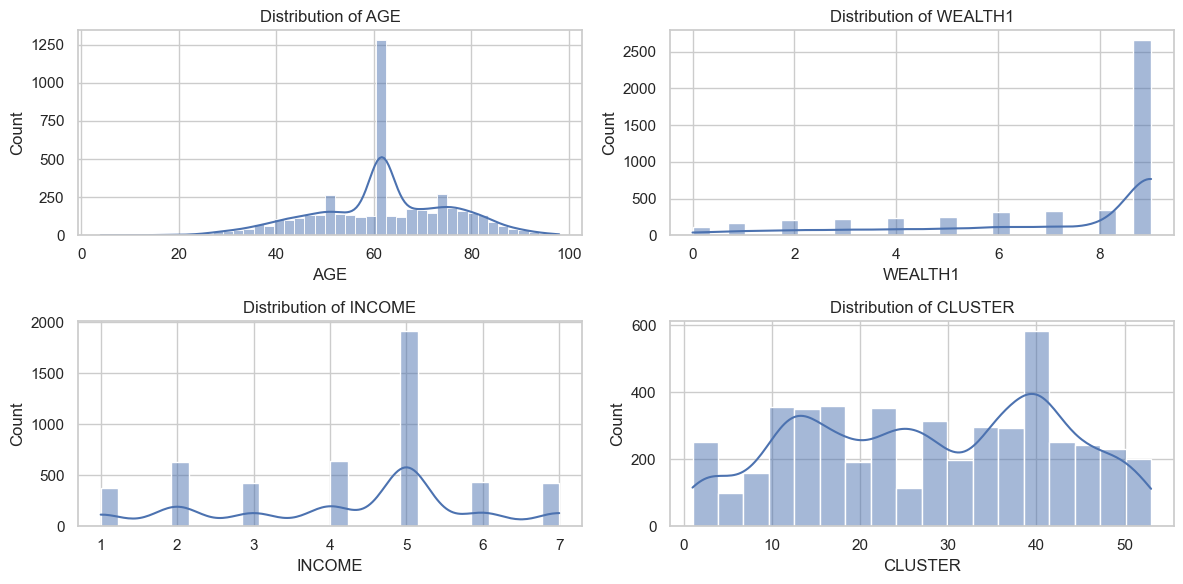

In [23]:
# Plot relevant features
feature_to_plot = ['AGE','WEALTH1','INCOME', 'CLUSTER']
plot_feature_distribution(data,feature_to_plot)

### Build the model

In [24]:
# X - y split
X = data.drop(['TARGET_D'], axis = 1)
y = data['TARGET_D']

# Split numerical and categorical
numericalX = X.select_dtypes(include = [np.number])
categoricalX = X.select_dtypes(exclude = [np.number])

# Reset indexes
numericalX.reset_index(drop=True, inplace=True)
categoricalX.reset_index(drop=True, inplace=True)

In [25]:
X

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
20,2,62.000000,3,8,10,2,25,40,27,11,...,36,1,88,1,94,4,96,3,87,1.0
30,0,61.611649,5,9,0,1,37,58,16,8,...,0,2,90,4,93,1,95,12,90,4.0
45,0,66.000000,5,9,5,0,33,24,39,6,...,31,10,93,12,94,4,96,2,87,4.0
78,0,69.000000,6,9,0,0,34,20,54,2,...,28,7,90,1,95,3,95,11,90,1.0
93,1,73.000000,1,7,10,0,21,53,8,5,...,24,10,92,9,95,9,95,9,92,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95298,2,45.000000,5,9,0,0,45,28,37,9,...,53,4,89,6,96,1,96,1,86,8.0
95309,0,51.000000,5,6,1,1,32,43,24,7,...,47,1,93,10,94,2,95,12,93,10.0
95398,0,86.000000,5,9,0,1,32,21,26,9,...,11,10,89,6,95,11,96,2,87,11.0
95403,0,58.000000,4,9,0,0,24,46,20,6,...,40,1,90,3,93,12,96,1,90,3.0


In [26]:
# One-Hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
encoded_categorical.columns = [str(col) if isinstance(col, int) else col for col in encoded_categorical.columns] # colums as strings

# Concat again the data
X = pd.concat([numericalX, encoded_categorical], axis = 1)


In [27]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [28]:

# Train dataframe
train = pd.concat([X_train, y_train], axis = 1)
train = train.reset_index(drop = True)

# Test dataframe
test = pd.concat([X_test, y_test], axis = 1)
test = test.reset_index(drop = True)

# Standardizing train variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_stand = scaler.fit_transform(train.drop("TARGET_D", axis = 1))
X_train_stand = pd.DataFrame(X_train_stand, columns = train.drop("TARGET_D", axis = 1).columns)

# Standardizing test variables
scaler = StandardScaler()
X_test_stand = scaler.fit_transform(test.drop("TARGET_D", axis = 1))
X_test_stand = pd.DataFrame(X_test_stand, columns = test.drop("TARGET_D", axis = 1).columns)

# Gathering X and y variables together again
train_stand = pd.concat([X_train_stand, train["TARGET_D"]], axis = 1)

Mean Squared Error (MSE): 88.7937993442969
Mean Absolute Error (MAE): 5.993319395944547
R-squared (R2): 0.4029491734200017


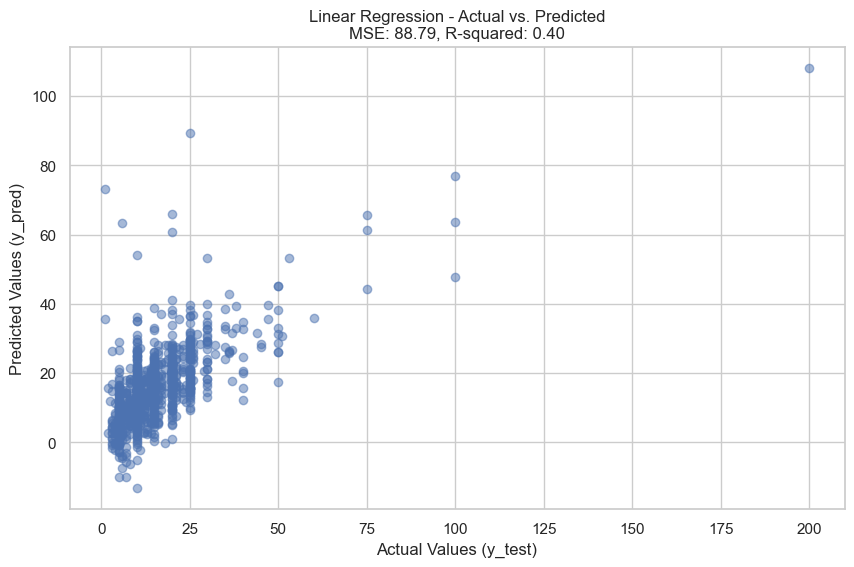

In [29]:
# Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


# Create a linear regression model
model = LinearRegression()

# Fit the model to the standardized training data
model.fit(X_train_stand, y_train)

y_pred = model.predict(X_test_stand)


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r_squared}")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title(f"Linear Regression - Actual vs. Predicted\nMSE: {mse:.2f}, R-squared: {r_squared:.2f}")
plt.grid(True)
plt.show()


An R2 value of approximately 0.0018 suggests that this model explains only a very small fraction of the variance in the target variable. A higher R2 indicates better model fit, but an R2 close to zero indicates poor model performance.  It's a good idea to consider <b>alternative models </b> that may capture the underlying relationships more effectively

In [30]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn import linear_model

lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=40)
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=40)

In [31]:
# Display best features
best_features = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
best_features['Column_name'] = X.columns
display(best_features[best_features['Rank']==1])

# Store best features in a list

best_features_list = best_features.loc[best_features['Rank'] == 1, 'Column_name'].tolist()
best_features_list

,Rank,Column_name
21,1,ETH1
25,1,ETH5
33,1,ETH13
34,1,ETH14
35,1,ETH15
36,1,ETH16
63,1,HHN2
64,1,HHN3
87,1,HU1
88,1,HU2


['ETH1',
 'ETH5',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'HHN2',
 'HHN3',
 'HU1',
 'HU2',
 'HHD1',
 'HHD2',
 'HHD4',
 'HHD7',
 'HHD8',
 'HHD9',
 'HHD10',
 'HHD11',
 'HHD12',
 'ETHC1',
 'ETHC2',
 'ETHC3',
 'ANC6',
 'ANC15',
 'LASTGIFT',
 'RFA_2F',
 '1',
 '5',
 '7',
 '9',
 '11',
 '12',
 '14',
 '15',
 '16',
 '19',
 '20',
 '21',
 '22',
 '23']

Mean Squared Error (MSE): 88.7937993442969
Mean Absolute Error (MAE): 5.993319395944547
R-squared (R2): 0.4029491734200017


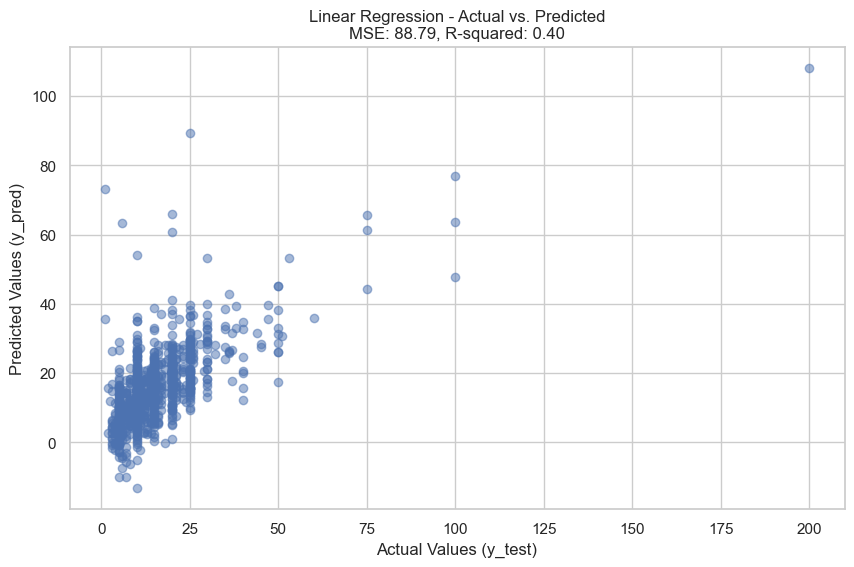

In [32]:
# Update X with best features

X = X.loc[:, best_features_list]

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


# Train dataframe
train = pd.concat([X_train, y_train], axis = 1)
train = train.reset_index(drop = True)

# Test dataframe
test = pd.concat([X_test, y_test], axis = 1)
test = test.reset_index(drop = True)

# Standardizing train variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_stand = scaler.fit_transform(train.drop("TARGET_D", axis = 1))
X_train_stand = pd.DataFrame(X_train_stand, columns = train.drop("TARGET_D", axis = 1).columns)

# Standardizing test variables
scaler = StandardScaler()
X_test_stand = scaler.fit_transform(test.drop("TARGET_D", axis = 1))
X_test_stand = pd.DataFrame(X_test_stand, columns = test.drop("TARGET_D", axis = 1).columns)

# Gathering X and y variables together again
train_stand = pd.concat([X_train_stand, train["TARGET_D"]], axis = 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the standardized training data
model.fit(X_train_stand, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r_squared}")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title(f"Linear Regression - Actual vs. Predicted\nMSE: {mse:.2f}, R-squared: {r_squared:.2f}")
plt.grid(True)
plt.show()







### Random Forest

In [35]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 100, max_depth = 50, max_features = 1.0, min_samples_leaf = 2,
                                                min_samples_split = 15, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Train score: ',clf.score(X_train, y_train))

print('Test score: ', clf.score(X_test, y_test))

Train score:  0.7185957388295523
Test score:  0.5353894202262317


In [36]:
# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r_squared = r2_score(y_test, y_pred)  # R-squared
rmse = np.sqrt(mse) # Root Mean Squared Error (RMSE)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r_squared}')
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 69.09719701751685
Mean Absolute Error (MAE): 4.422007709943017
R-squared (R2): 0.5353894202262317
Root Mean Squared Error (RMSE): 8.31


In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

# Hyperparameter tuning

rf_regressor = RandomForestRegressor()

# Specify parameters and distributions to sample from
param_dist = {
    'n_estimators': sp_randint(250, 1000),  # Number of trees in the forest
    'max_depth': [None] + list(range(30, 50)),  # Maximum depth of the tree
    'min_samples_split': sp_randint(2, 11),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': sp_randint(1, 11),  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None] + list(np.arange(0.1, 1.1, 0.1)),  # Number of features to consider at every split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Define the random search
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the random search model
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/leozinho.air/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/leozinho.air/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/leozinho.air/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

/Users/leozinho.air/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/leozinho.air/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/leozinho.air/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

/Users/leozinho.air/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/leozinho.air/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/leozinho.air/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

Best parameters found:  {'bootstrap': True, 'max_depth': 30, 'max_features': 0.6000000000000001, 'min_samples_leaf': 9, 'min_samples_split': 6, 'n_estimators': 895}
Best score found:  -83.70657637011205


In [ ]:
# Best Parameters
# {'bootstrap': True, 'max_depth': 30, 'max_features': 0.6000000000000001, 'min_samples_leaf': 9, 'min_samples_split': 6, 'n_estimators': 895}

In [40]:
# Updated Random Forest
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 895, max_depth = 30, max_features = 0.6, min_samples_leaf = 9,
                                                min_samples_split = 6, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Train score: ',clf.score(X_train, y_train))

print('Test score: ', clf.score(X_test, y_test))

Train score:  0.6236979932418776
Test score:  0.553140124107739


In [41]:
# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r_squared = r2_score(y_test, y_pred)  # R-squared
rmse = np.sqrt(mse) # Root Mean Squared Error (RMSE)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r_squared}')
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 66.4573004316549
Mean Absolute Error (MAE): 4.164104872344067
R-squared (R2): 0.553140124107739
Root Mean Squared Error (RMSE): 8.15


In [47]:
sum_amount_total = sum(y_pred)

print(f'The expected sum of the donations are: {int(sum_amount_total)}$')

The expected sum of the donations are: 15408$
